In [571]:
import pickle
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

DATA_DIR = 'data'
SUBMISSION_DIR = 'submit'
PICKLE_DIR = 'pickle'
SUBMIT_FILENAME = 'submit-04-V1'

In [572]:
def load_pickle(filename):
    with open(filename,'rb') as f:
         data = pickle.load(f)
    return data

In [196]:
sorted(glob.glob(os.path.join(PICKLE_DIR, '*.pkl')))

['pickle/CRASH-r2plus1d_18-heavy-model-cnn-255x255-frameskip-2-batch-4-seed-0-0.00011-f1-1.00000.pkl',
 'pickle/CRASH-r2plus1d_18-heavy-model-cnn-255x255-frameskip-2-batch-4-seed-10-0.00002-f1-1.00000.pkl',
 'pickle/CRASH-r2plus1d_18-resize-crop-model-cnn-112x112-fs-2-batch-4-seed-546-kfold-1-0.00047-f1-1.00000.pkl',
 'pickle/Crash-Cls-Model-0.00106.pkl',
 'pickle/Crash-Cls-Model-SEED-321-0.00106.pkl',
 'pickle/Crash-Cls-Model-SEED-345-0.00134.pkl',
 'pickle/EGO-r2plus1d_18-resize-crop-model-cnn-112x112-frameskip-2-batch-4-seed-0-kfold-1-0.00008-f1-1.00000.pkl',
 'pickle/EGO-r2plus1d_18-resize-crop-model-cnn-112x112-fs-3-batch-8-seed-967-kfold-1-0.07632-f1-0.90846.pkl',
 'pickle/EGO-r2plus1d_18-resize-crop-model-cnn-224x224-fs-3-batch-8-seed-60-kfold-1-0.07919-f1-0.90648.pkl',
 'pickle/EGO-r2plus1d_18-resize-crop-xval-model-cnn-112x112-fs-3-batch-8-seed-452-kfold-1-0.08180-f1-0.90312.pkl',
 'pickle/EGO-tmp_model_default-model-cnn-112x112-frameskip-2-batch-4-seed-0-kfold-1-0.00000-f1-1.

In [668]:
wn_files = [
#     '[XVAL]WN-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-373-kfold-1-0.18447-f1-0.74959.pkl',
#     '[XVAL]WN-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-417-kfold-1-0.09147-f1-0.73693.pkl', # 0.643878519
    '[XVAL]WN-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-696-kfold-1-0.09541-f1-0.80037.pkl',
    '[XVAL]WN-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-970-kfold-1-0.16881-f1-0.80309.pkl'
#     '[XVAL]WN-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-139-kfold-1-0.09204-f1-0.73802.pkl',
#     '[XVAL]WN-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-819-kfold-1-0.09364-f1-0.74641.pkl',
]

wsr_files = [
    '[XVAL]WSR-r2plus1d_18-model-cnn-112x112-fs-3-batch-8-seed-615-kfold-1-0.09154-f1-0.93769.pkl',
#     '[XVAL]WSR-r2plus1d_18-model-cnn-112x112-fs-3-batch-8-seed-194-kfold-1-0.04552-f1-0.93186.pkl', # 0.643878519
    '[XVAL]WSR-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-979-kfold-1-0.02576-f1-0.95969.pkl',
#     '[XVAL]WSR-r2plus1d_18-model-cnn-224x224-fs-3-batch-8-seed-624-kfold-1-0.03029-f1-0.92670.pkl',
    '[XVAL]WSR-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-33-kfold-1-0.03266-f1-0.94519.pkl'
]

In [669]:
wn, wsr = np.zeros(shape=(1800, 2)), np.zeros(shape=(1800, 2))

for wn_file in wn_files:
    wn_ = load_pickle(os.path.join(PICKLE_DIR, wn_file))
    wn_ = np.array(wn_).mean(axis=0)
    wn += wn_
    
for wsr_file in wsr_files:
    wsr_ = load_pickle(os.path.join(PICKLE_DIR, wsr_file))
    wsr_ = np.array(wsr_).mean(axis=0)
    wsr += wsr_

In [670]:
wn_pred = wn.argmax(axis=1)
wn_pred

array([0, 0, 1, ..., 0, 0, 0])

In [671]:
wn_pred = wn.argmax(axis=1)
wsr_pred = wsr.argmax(axis=1)
wsr_pred = wsr_pred + 1
weather_pred = wn_pred * wsr_pred

In [922]:
crash_files = [
#     'Crash-Cls-Model-SEED-321-0.00106.pkl', # 0.6865544182(best) # 0.684858525
#     'Crash-Cls-Model-SEED-345-0.00134.pkl', # 0.6865544182(best) # 0.684858525
#     'CRASH-r2plus1d_18-heavy-model-cnn-255x255-frameskip-2-batch-4-seed-0-0.00011-f1-1.00000.pkl', # ensemble # 0.6854785709 (2nd) # 0.684858525, # 0.6818615702 # 0.6355532314
#     'CRASH-r2plus1d_18-heavy-model-cnn-255x255-frameskip-2-batch-4-seed-10-0.00002-f1-1.00000.pkl', # ensemble # 0.6854785709 (2nd) # 0.684858525 # 0.6355532314
#     'CRASH-r2plus1d_18-resize-crop-model-cnn-112x112-fs-2-batch-4-seed-546-kfold-1-0.00047-f1-1.00000.pkl' # 0.6818615702
#     '[XVAL]CRASH-r2plus1d_18-model-cnn-112x112-fs-3-batch-8-seed-720-kfold-1-0.00087-f1-0.99897.pkl',
#     '[XVAL]CRASH-r2plus1d_18-model-cnn-224x224-fs-2-batch-4-seed-817-kfold-1-0.00809-f1-1.00000.pkl',
#     '[XVAL]CRASH-r2plus1d_18-model-cnn-224x224-fs-3-batch-4-seed-734-kfold-1-0.00830-f1-0.99948.pkl',
#     '[XVAL]CRASH-r2plus1d_18-model-cnn-112x112-fs-3-batch-8-seed-720-kfold-1-0.00087-f1-0.99897.pkl'
#     '[XVAL]CRASH-rnn-model-cnn-224x224-fs-3-batch-4-seed-844-kfold-1-0.06715-f1-0.92322.pkl',
#     '[XVAL]CRASH-rnn-model-cnn-224x224-fs-3-batch-4-seed-480-kfold-1-0.04293-f1-0.90087.pkl',
#     '[XVAL]CRASH-rnn-model-cnn-224x224-fs-3-batch-4-seed-844-kfold-1-0.06715-f1-0.92322.pkl',
#     '[XVAL]CRASH-rnn-model-cnn-224x224-fs-3-batch-8-seed-826-kfold-1-0.07112-f1-0.91398.pkl',
#     '[XVAL]CRASH-r2plus1d_18-model-cnn-224x224-fs-2-batch-4-seed-817-kfold-1-0.00809-f1-1.00000.pkl'
#     '[XVAL]CRASH-rnn-model-rnn-112x112-fs-3-batch-4-seed-694-kfold-1-0.11764-f1-0.85258.pkl',
#     '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-789-kfold-1-0.03544-f1-0.99221.pkl',
#     '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-553-kfold-1-0.00899-f1-0.99845.pkl',
#     '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-165-kfold-1-0.00973-f1-0.99637.pkl',
#     '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-165-kfold-1-0.00973-f1-0.99637.pkl',
    '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-187-kfold-1-0.03288-f1-0.99534.pkl', #VAR
    '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-4-seed-553-kfold-1-0.00899-f1-0.99845.pkl', #VAR
    '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-127-kfold-1-0.03260-f1-0.99482.pkl', #VAR
#     '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-759-kfold-1-0.03218-f1-0.99690.pkl',
#     '[XVAL]CRASH-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-789-kfold-1-0.03544-f1-0.99221.pkl',
]

ego_files = [
#     'Ego-Classifier-V1-r2plus1d_18-255x255-cuda0-SEED-567-0.07404.pkl',
#     'EGO-Classifier-V1-r2plus1d_18-255x255-frameskip-2-batch-8-seed-567-0.00889.pkl', # 0.6865544182(best), 0.5213793652 (top)
#     'EGO-Classifier-V1-r2plus1d_18-255x255-frameskip-2-batch-8-seed-123-0.01809.pkl'
#     'EGO-r2plus1d_18-heavy-model-cnn-255x255-frameskip-2-batch-4-seed-0-0.01703-f1-0.80872.pkl', # 0.5977034593 (poor)
#     'EGO-r2plus1d_18-heavy-model-cnn-255x255-frameskip-2-batch-4-seed-10-0.01268-f1-0.87394.pkl', # 0.5977034593 (poor)
#     'EGO-tmp_model_default-model-cnn-112x112-frameskip-2-batch-4-seed-0-kfold-1-0.00000-f1-1.00000.pkl', # 0.684858525
#     'EGO-r2plus1d_18-resize-crop-model-cnn-112x112-frameskip-2-batch-4-seed-0-kfold-1-0.00008-f1-1.00000.pkl', # 0.684858525
#     'EGO-r2plus1d_18-resize-crop-model-cnn-224x224-fs-3-batch-8-seed-60-kfold-1-0.07919-f1-0.90648.pkl', # 0.6818615702
#     'EGO-r2plus1d_18-resize-crop-model-cnn-112x112-fs-3-batch-8-seed-967-kfold-1-0.07632-f1-0.90846.pkl', # 0.6818615702
#     'EGO-r2plus1d_18-resize-crop-xval-model-cnn-112x112-fs-3-batch-8-seed-452-kfold-1-0.08180-f1-0.90312.pkl', # 0.6818615702
#      '[XVAL]EGO-r2plus1d_18-model-cnn-112x112-fs-2-batch-8-seed-640-kfold-1-0.04259-f1-0.90511.pkl', # ?
#      '[XVAL]EGO-r2plus1d_18-model-cnn-224x224-fs-5-batch-4-seed-734-kfold-1-0.08967-f1-0.89015.pkl', # 0.6355532314
#      '[XVAL]EGO-r2plus1d_18-model-cnn-112x112-fs-2-batch-8-seed-611-kfold-1-0.04282-f1-0.89706.pkl', # 0.6355532314
#      '[XVAL]EGO-r2plus1d_18-model-cnn-224x224-fs-2-batch-4-seed-449-kfold-1-0.04482-f1-0.88902.pkl',   # 0.6355532314
     '[XVAL]EGO-x3d_m-model-cnn-224x224-fs-2-batch-4-seed-394-kfold-1-0.04222-f1-0.91201.pkl', 
     '[XVAL]EGO-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-61-kfold-1-0.08227-f1-0.90514.pkl'
]

weather_files = [
#     'Weather-Classifier-V1-r2plus1d_18-255x255-cuda1-SEED-567-0.03753.pkl',
#     'WEATHER-Classifier-V1-r2plus1d_18-255x255-frameskip-2-batch-8-seed-567-0.00986.pkl', 
#     'WEATHER-Classifier-V1-r2plus1d_18-255x255-frameskip-2-batch-8-seed-123-0.25076.pkl',
#     'WEATHER-Classifier-V1-r2plus1d_18-255x255-frameskip-1-batch-8-seed-123-0.20661.pkl', 
#     'WEATHER-Classifier-V1-r2plus1d_18-255x255-frameskip-2-batch-8-seed-2023-0.24641.pkl', # center-crop
#     'WEATHER-Classifier-V1-slow_r50-255x255-frameskip-2-batch-8-seed-42-0.45572.pkl',
#     'Weather-Classifier-V1-r2plus1d_18-255x255-cuda1-SEED-567-0.03753.pkl',
#     'WEATHER-Classifier-V1-slow_r50-255x255-frameskip-2-batch-8-seed-42-0.45572.pkl', # 0.5213793652 (top) 
#     'WEATHER-Classifier-V1-slow_r50-255x255-frameskip-1-batch-8-seed-135-epoch-1-loss-0.43815-f1-0.55275.pkl',
#     'WEATHER-Classifier-V1-slow_r50-255x255-frameskip-1-batch-8-seed-135-epoch-2-loss-0.38677-f1-0.59659.pkl' #0.4406144715
#     'WEATHER-Classifier-V1-slow_r50-255x255-frameskip-1-batch-8-seed-135-epoch-15-loss-0.40327-f1-0.62998.pkl', # 0.5208839468
#     'WEATHER-Classifier-V1-slow_r50-255x255-frameskip-1-batch-8-seed-135-epoch-18-loss-0.38370-f1-0.63455.pkl',
#     'WEATHER-Classifier-V1-slow_r50-255x255-frameskip-1-batch-8-seed-100-epoch-4-loss-0.40105-f1-0.63010.pkl', 
#     'WEATHER-Classifier-V1-slow_r50-255x255-frameskip-1-batch-8-seed-200-epoch-2-loss-0.39777-f1-0.63798.pkl', 
#     'WEATHER-slow_r50-model-can-255x255-frameskip-2-batch-8-seed-0-0.62483-f1-0.70351.pkl' # not tried..
#     'WEATHER-r2plus1d_18-heavy-v2-model-cnn-255x255-frameskip-2-batch-4-seed-30-0.28146-f1-0.75429.pkl', # 0.6665658906 (아래 모델과 앙상블시)
#     'WEATHER-r2plus1d_18-model-cnn-255x255-frameskip-2-batch-4-seed-0-0.31813-f1-0.75749.pkl', # 0.6865544182(best), lr=5e-5 # 0.684858525, 0.6818615702
#     'WEATHER-r2plus1d_18-resize-crop-model-can-112x112-frameskip-2-batch-4-seed-0-0.00059-f1-1.00000.pkl', # 0.67616948 best에서 이것만 바꾼 결과 # 0.684858525
#     'WEATHER-r2plus1d_18-resize-crop-model-cnn-112x112-fs-3-batch-8-seed-281-kfold-1-0.54456-f1-0.75811.pkl',
#     'WEATHER-r2plus1d_18-resize-crop-xval-model-cnn-112x112-fs-3-batch-8-seed-224-kfold-1-0.57961-f1-0.72420.pkl',
#     '[XVAL]WEATHER-mc3_18-model-cnn-112x112-fs-3-batch-8-seed-366-kfold-1-0.17040-f1-0.69242.pkl', # 0.581865929
#     '[XVAL]WEATHER-x3d_m-model-cnn-112x112-fs-3-batch-4-seed-891-kfold-1-0.17395-f1-0.69582.pkl' # 0.581865929
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-2-batch-8-seed-898-kfold-1-0.60833-f1-0.71520.pkl', # 0.5585714517 # 0.6355532314
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-544-kfold-1-0.40138-f1-0.71165.pkl', # BEST_0.7175013647 # BEST_ENS_0.683 # 0.6355532314
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-224x224-fs-3-batch-8-seed-103-kfold-1-0.36766-f1-0.72513.pkl', # 0.58
#     '[XVAL]WEATHER-x3d_m-model-cnn-112x112-fs-2-batch-8-seed-820-kfold-1-0.18421-f1-0.70882.pkl', # 0.6229
#     'WEATHER-x3d_m-resize-crop-xval-model-cnn-224x224-fs-3-batch-8-seed-106-kfold-1-0.62130-f1-0.76370.pkl' # 0.59
#     'WEATHER-x3d_m-resize-crop-xval-model-cnn-224x224-fs-3-batch-8-seed-106-kfold-1-0.62130-f1-0.76370.pkl' # 0.59
#     '[XVAL]WEATHER-x3d_m-model-cnn-112x112-fs-2-batch-8-seed-820-kfold-1-0.18421-f1-0.70882.pkl', # BEST_ENS_0.683 # 0.6229
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-224x224-fs-3-batch-8-seed-103-kfold-1-0.36766-f1-0.72513.pkl', # 0.68 -> 0.62 하락 요인
#     '[XVAL]WEATHER-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-508-kfold-1-0.27430-f1-0.71739.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-271-kfold-1-0.40853-f1-0.72473.pkl', # BEST_0.7175013647, 단일 0.6499
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-999-kfold-1-0.49469-f1-0.74476.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-919-kfold-1-0.44290-f1-0.74178.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-894-kfold-1-0.62864-f1-0.71519.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-950-kfold-1-0.42735-f1-0.75148.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-404-kfold-1-0.41425-f1-0.76041.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-224x224-fs-3-batch-8-seed-103-kfold-1-0.36766-f1-0.72513.pkl'
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-224x224-fs-3-batch-8-seed-103-kfold-1-0.36766-f1-0.72513.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-309-kfold-1-0.41935-f1-0.75862.pkl'
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-235-kfold-1-0.41059-f1-0.70845.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-950-kfold-1-0.42735-f1-0.75148.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-919-kfold-1-0.44290-f1-0.74178.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-727-kfold-1-0.73567-f1-0.71571.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-653-kfold-1-0.44581-f1-0.71517.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-56-kfold-1-0.41836-f1-0.74313.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-5-kfold-1-0.41286-f1-0.71524.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-271-kfold-1-0.40853-f1-0.72473.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-235-kfold-1-0.41059-f1-0.70845.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-544-kfold-1-0.38909-f1-0.64901.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-544-kfold-1-0.39231-f1-0.63086.pkl'
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-950-kfold-1-0.42735-f1-0.75148.pkl'
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-544-kfold-1-0.38909-f1-0.64901.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-727-kfold-1-0.73567-f1-0.71571.pkl', 
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-224x224-fs-3-batch-8-seed-103-kfold-1-0.36766-f1-0.72513.pkl'
    ############ 최종, low var, best f1 score ###########
    '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-950-kfold-1-0.42735-f1-0.75148.pkl', 
    '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-919-kfold-1-0.44290-f1-0.74178.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-56-kfold-1-0.41836-f1-0.74313.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-271-kfold-1-0.40853-f1-0.72473.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-533-kfold-1-0.65048-f1-0.74602.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-288-kfold-1-0.43189-f1-0.74982.pkl',
#     '[XVAL]WEATHER-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-271-kfold-1-0.40853-f1-0.72473.pkl'
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-999-kfold-1-0.49469-f1-0.74476.pkl'
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-727-kfold-1-0.73567-f1-0.71571.pkl',  
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-235-kfold-1-0.41059-f1-0.70845.pkl'
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-544-kfold-1-0.38909-f1-0.64901.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-727-kfold-1-0.73567-f1-0.71571.pkl', 
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-224x224-fs-3-batch-8-seed-103-kfold-1-0.36766-f1-0.72513.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-544-kfold-1-0.38909-f1-0.64901.pkl',
#     '[XVAL]WEATHER-r2plus1d_18-model-cnn-112x112-fs-3-batch-4-seed-544-kfold-1-0.39231-f1-0.63086.pkl'
#     '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-899-kfold-1-0.43628-f1-0.73518.pkl',
    '[XVAL]WEATHER-x3d_m-model-cnn-256x256-fs-3-batch-4-seed-533-kfold-1-0.65048-f1-0.74602.pkl',
]

timing_files = [
#     'Timing-Classifier-V1-r2plus1d_18-255x255-cuda0-SEED-567-0.00935.pkl',
#     'TIMING-Classifier-V1-r2plus1d_18-255x255-frameskip-2-batch-8-seed-567-0.00389.pkl',
#     'TIMING-Classifier-V1-r2plus1d_18-255x255-frameskip-5-batch-8-seed-123-0.00103.pkl',
#     'TIMING-Classifier-V1-r2plus1d_18-255x255-frameskip-2-batch-8-seed-123-0.14732.pkl', # 0.6569(best), 0.5213793652 (top) 
#     'TIMING-Classifier-V1-slow_r50-255x255-frameskip-1-batch-8-seed-135-epoch-3-loss-0.07839-f1-0.92541.pkl',
#     'TIMING-Classifier-V1-r2plus1d_18-255x255-frameskip-2-batch-8-seed-123-0.01256.pkl'
#     'TIMING-Classifier-V1-Base-255x255-frameskip-1-batch-8-seed-123-0.01445.pkl',
#     'TIMING-Classifier-V1-Base-255x255-frameskip-1-batch-8-seed-2023-0.05520.pkl', 
#     'TIMING-Classifier-V1-EWT-255x255-frameskip-5-batch-4-seed-32-0.01543.pkl' # five-crop
#     'TIMING-r2plus1d_18-heavy-model-cnn-255x255-frameskip-2-batch-4-seed-10-0.01495-f1-0.90054.pkl', # 0.6865544182(best), ensemble, # 0.6355532314
#     'TIMING-r2plus1d_18-heavy-model-cnn-255x255-frameskip-2-batch-4-seed-0-0.01604-f1-0.89667.pkl', # 0.6865544182(best), ensemble, # 0.6355532314
#     'TIMING-r2plus1d_18-resize-crop-model-cnn-112x112-frameskip-2-batch-4-seed-0-kfold-1-0.00008-f1-1.00000.pkl', # 0.684858525 (위에 두 모델과 앙상블시)
#     'TIMING-tmp_model_default-model-cnn-112x112-frameskip-2-batch-4-seed-0-kfold-1-0.00173-f1-1.00000.pkl',       # 0.684858525
#     'TIMING-r2plus1d_18-resize-crop-model-cnn-112x112-fs-3-batch-8-seed-222-kfold-1-0.11754-f1-0.90921.pkl', # 0.6818615702
#     'TIMING-r2plus1d_18-resize-crop-model-cnn-112x112-fs-3-batch-8-seed-738-kfold-1-0.10456-f1-0.91360.pkl', # 0.6818615702
#     '[XVAL]TIMING-r2plus1d_18-model-cnn-224x224-fs-3-batch-8-seed-9-kfold-1-0.06313-f1-0.89232.pkl',
#     '[XVAL]TIMING-r2plus1d_18-model-cnn-112x112-fs-3-batch-8-seed-556-kfold-1-0.05055-f1-0.92142.pkl', #BEST 
#     '[XVAL]TIMING-r2plus1d_18-model-cnn-112x112-fs-3-batch-8-seed-930-kfold-1-0.02393-f1-0.91935.pkl', #BEST
#     '[XVAL]TIMING-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-480-kfold-1-0.05005-f1-0.91551.pkl',       #BEST
    '[XVAL]TIMING-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-961-kfold-1-0.05418-f1-0.91396.pkl',
#     '[XVAL]TIMING-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-768-kfold-1-0.04821-f1-0.89372.pkl',
#     '[XVAL]TIMING-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-294-kfold-1-0.05222-f1-0.90244.pkl',
    '[XVAL]TIMING-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-853-kfold-1-0.11027-f1-0.92667.pkl',
    '[XVAL]TIMING-x3d_m-model-cnn-224x224-fs-3-batch-8-seed-432-kfold-1-0.11165-f1-0.91163.pkl'
]

In [923]:
def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [924]:
crash = np.zeros(shape=(1800, 2))

for crash_file in crash_files:
    c = load_pickle(os.path.join(PICKLE_DIR, crash_file))
#     c = np.array(c)
#     c = normalize(c)
    c = np.array(c).mean(axis=0)
    crash += c

In [925]:
ego, weather, timing = np.zeros(shape=(1800, 2)), np.zeros(shape=(1800, 3)), np.zeros(shape=(1800, 2))

for ego_file in ego_files:
    e = load_pickle(os.path.join(PICKLE_DIR, ego_file))
#     e = np.array(e)
#     ego += normalize(e)
    e = np.array(e).mean(axis=0)
    ego += e
    
for weather_file in weather_files:
    w = load_pickle(os.path.join(PICKLE_DIR, weather_file))

    w = np.array(w).mean(axis=0)
#     w = np.array(w)
#     weather += normalize(w)
    weather += w
    
for timing_file in timing_files:
    t = load_pickle(os.path.join(PICKLE_DIR, timing_file))
#     t = np.array(t)
#     timing += normalize(t)
    t = np.array(t).mean(axis=0)
    timing += t

In [926]:
crash_pred = crash.argmax(1)
ego_pred = ego.argmax(1)
weather_pred = weather.argmax(1)
timing_pred = timing.argmax(1)

In [927]:
# best 0.7175
pd.Series(weather_pred).value_counts()

0    1456
1     182
2     162
dtype: int64

In [542]:
# 0.7141
# crash_norm = crash / 2
# crash_pred = 1 - (crash_norm[:, 0] >= 0.9).astype(int)
# pd.Series(crash_pred).value_counts()

In [707]:
# best
pd.Series(crash_pred).value_counts()

0    1218
1     582
dtype: int64

In [833]:
# trial
pd.Series(crash_pred).value_counts()

0    1218
1     582
dtype: int64

In [708]:
# best
pd.Series(ego_pred).value_counts()

1    1345
0     455
dtype: int64

In [834]:
# trial
pd.Series(ego_pred).value_counts()

1    1345
0     455
dtype: int64

In [862]:
# best 0.7175
pd.Series(weather_pred).value_counts()

0    1463
1     174
2     163
dtype: int64

In [762]:
# trial (best 0.7175)
strong_normal = (wn[:,0] > 0.95).astype(int)
strong_normal = 1 - strong_normal
weather_pred = pd.Series(weather_pred * strong_normal)
weather_pred.value_counts()

0    1531
1     145
2     124
dtype: int64

In [716]:
# trial
pd.Series(weather_pred).value_counts()

0    1254
2     315
1     231
dtype: int64

In [358]:
# trial
strong_normal = (wn[:,0] > 0.95).astype(int)
strong_normal = 1 - strong_normal
weather_pred = pd.Series(weather_pred * strong_normal)
weather_pred.value_counts()

0    1396
2     215
1     189
dtype: int64

In [2097]:
pd.Series(weather_pred).value_counts()

0    1403
2     217
1     180
dtype: int64

In [1976]:
# best 0.6832
pd.Series(weather_pred).value_counts()

0    1395
2     222
1     183
dtype: int64

In [1311]:
# trial 0.6229
pd.Series(weather_pred).value_counts()

0    1446
2     190
1     164
dtype: int64

In [1501]:
# trial (wn + wsr) 4
pd.Series(weather_pred).value_counts()

0    1421
2     210
1     169
dtype: int64

In [1516]:
# trial (wn + wsr) 5
pd.Series(weather_pred).value_counts()

0    1467
2     176
1     157
dtype: int64

In [1480]:
# trial
pd.Series(weather_pred).value_counts()

0    1395
2     223
1     182
dtype: int64

In [236]:
# trial
pd.Series(weather_pred).value_counts()

0    1421
2     202
1     177
dtype: int64

In [1435]:
# trial (wn + wsr)
pd.Series(weather_pred).value_counts()

0    1225
1     288
2     287
dtype: int64

In [1451]:
# trial (wn + wsr) 2
pd.Series(weather_pred).value_counts()

0    1316
2     255
1     229
dtype: int64

In [1475]:
# trial (wn + wsr) 3
pd.Series(weather_pred).value_counts()

0    1316
2     280
1     204
dtype: int64

In [2201]:
# trial
pd.Series(weather_pred).value_counts()

0    1395
2     222
1     183
dtype: int64

In [177]:
# best
pd.Series(timing_pred).value_counts()

0    1142
1     658
dtype: int64

In [717]:
# trial
pd.Series(timing_pred).value_counts()

0    1142
1     658
dtype: int64

In [928]:
pred_df = pd.DataFrame({
    'crash': crash_pred,
    'ego': ego_pred,
    'weather': weather_pred, 
    'timing': timing_pred
})

<BarContainer object of 13 artists>

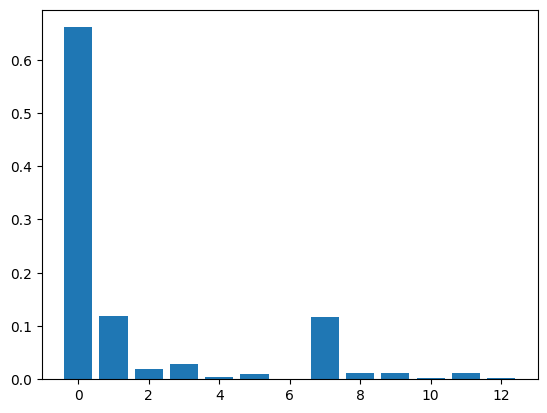

In [930]:
original = pd.read_csv(os.path.join('data', 'train.csv'))
original['label'].value_counts(1).sort_index()
plt.bar(x = np.arange(13), height=original['label'].value_counts(1).sort_index())

In [931]:
pred = pred_df['crash'] * (pred_df['ego']*6 + pred_df['weather']*2 + pred_df['timing'] + 1)
pred.value_counts(1)

0     0.676667
7     0.119444
1     0.096667
3     0.038889
9     0.013889
11    0.012222
2     0.011111
8     0.010000
5     0.007222
4     0.007222
6     0.003889
10    0.001667
12    0.001111
dtype: float64

(0.0, 0.15)

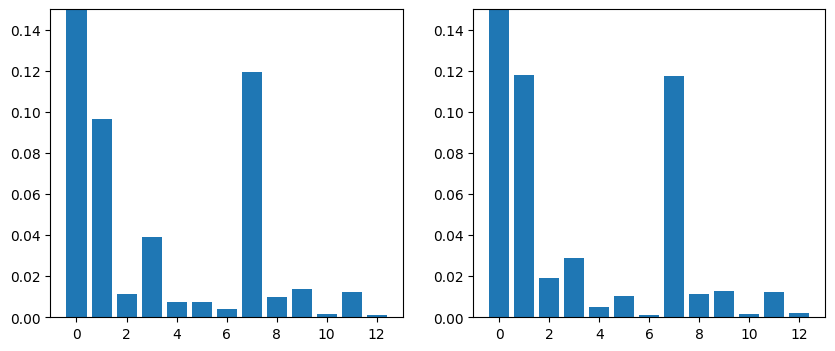

In [932]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
axes[0].bar(x=np.arange(13), height=pred.value_counts(1).sort_index())
axes[1].bar(x=np.arange(13), height=original['label'].value_counts(1).sort_index())
axes[0].set_ylim(0,0.15)
axes[1].set_ylim(0,0.15)

In [933]:
# 제출 양식 로드
submit = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))
# 정답 기입
submit['label'] = pred
submit.head()

,sample_id,label
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0


In [935]:
submit['label'].value_counts().sort_index()

0     1218
1      174
2       20
3       70
4       13
5       13
6        7
7      215
8       18
9       25
10       3
11      22
12       2
Name: label, dtype: int64

In [937]:
# csv 생성
timestring = datetime.now().strftime('%Y%m%d-%H%M%S')
filename = f'{timestring}-{SUBMIT_FILENAME}.csv'
f_name = os.path.join(SUBMISSION_DIR, filename)
print(f_name)
submit.to_csv(f_name, index=False)
print('Saved.')

submit/20230312-174515-submit-04-V1.csv
Saved.
